In [4]:
import dynamiqs as dq
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pickle

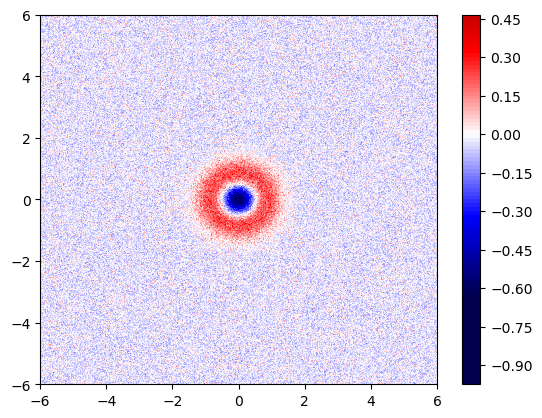

In [9]:
def load_wigner(file):
    with open(file, "rb") as f:
        wigner_fct = pickle.load(f)
    return wigner_fct


wigner_fct = load_wigner("../../data/synthetic/noisy_wigner_1.pickle")
xvec, yvec, wigner = load_wigner("../../data/synthetic/noisy_wigner_1.pickle")
def plot_wigner(xvals, yvals, wigner_values):
    plt.contourf(
        xvals,
        yvals,
        wigner_values.T,
        levels=100,
        cmap="seismic",
        vmin=-2 / np.pi,
        vmax=2 / np.pi,
    )
    plt.colorbar()



plot_wigner(*wigner_fct)


In [6]:
import numpy as np
from scipy.ndimage import gaussian_filter, uniform_filter

# assume wigner_noisy is your 2D array

# 1. build binary masks of positive and negative
pos_mask = (wigner_noisy > 0).astype(float)
neg_mask = (wigner_noisy < 0).astype(float)

# 2. choose a window size (in pixels) over which to look for clusters
win = 11   # e.g. 11×11 neighborhood

# 3. compute local counts (actually local fractions) of positives/negatives
# uniform_filter sums (here since mask is 0/1, it gives count) then we normalize by total window size
local_pos_frac = uniform_filter(pos_mask, size=win)
local_neg_frac = uniform_filter(neg_mask, size=win)

# 4. define your cluster thresholds
# for instance, if more than 50% of the window is positive (resp. negative):
thr = 0.4

cluster_mask = (local_pos_frac > thr) & (local_neg_frac > thr)

# 5. make a heavily‐smoothed version of the whole noisy Wigner
smooth_heavy = gaussian_filter(wigner_noisy, sigma=5)

# 6. combine: apply the heavy smooth only inside clusters
wigner_denoised = wigner_noisy.copy()
wigner_denoised_np=np.array(wigner_denoised)
wigner_denoised_np[cluster_mask] = smooth_heavy[cluster_mask]

# 7. plot
plot_wigner(xvec, yvec, wigner_denoised_np)

NameError: name 'wigner_noisy' is not defined

In [140]:
import numpy as np
from scipy.ndimage import uniform_filter

# assume wigner_noisy is your 2D array

# 1. compute local mean of W and local mean of W² over a small window
win = 10                          # size of the patch in pixels
mean1 = uniform_filter(wigner, size=win)
mean2 = uniform_filter(wigner**2, size=win)

# 2. estimate the local variance: Var = E[W²] – (E[W])²
local_var = mean2 - mean1**2

# 3. pick a threshold for “flatness” (tune this)
var_thr = np.percentile(local_var, 5)  
# e.g. take the bottom 5% of variances

# 4. build a mask of flat regions
flat_mask = local_var <= var_thr

# 5. estimate b by averaging wigner_noisy over all flat pixels
b_est = np.mean(wigner[flat_mask])

print("Estimated offset b =", b_est)

Estimated offset b = -0.0009921911


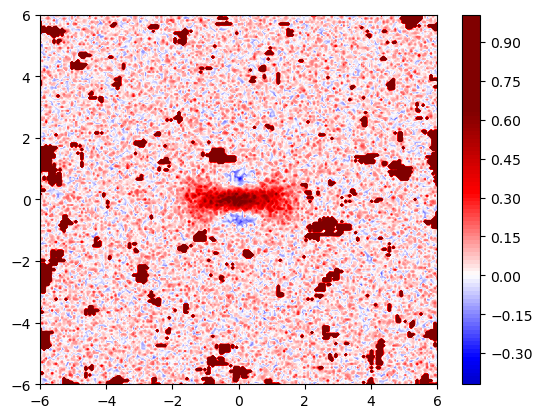

In [119]:
wigner_noisy_np=np.array(wigner_noisy)
wigner_noisy_np[flat_mask]=1
plot_wigner(xvec, yvec, wigner_noisy_np)

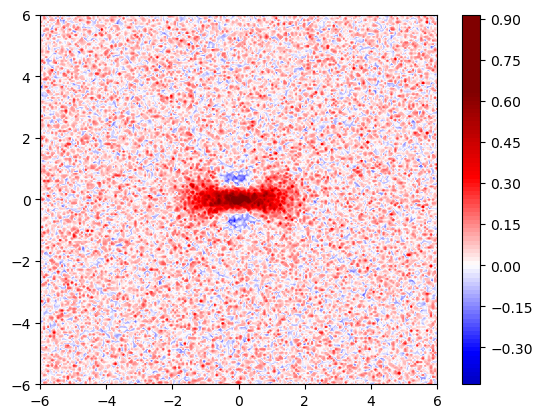

In [141]:
wigner_noisy_offsetted=wigner_noisy-b_est
plot_wigner(xvec, yvec, wigner_noisy_offsetted)

In [142]:
integral=np.sum(wigner_noisy_offsetted)/wigner_noisy_offsetted.shape[0]**2*12**2
wigner_noisy_corrected=wigner_noisy_offsetted/integral
integral

Array(0.98957163, dtype=float32)

In [143]:
relevant_mask=np.logical_not(cluster_mask)
relevant_mask_true_values=relevant_mask.sum()
integral=np.sum(wigner_noisy_offsetted[relevant_mask])/wigner_noisy_offsetted.shape[0]**2*12**2
integral

Array(0.93341535, dtype=float32)

In [44]:
integral=np.sum(wigner)/wigner.shape[0]**2*12**2
integral

Array(0.9900737, dtype=float32)

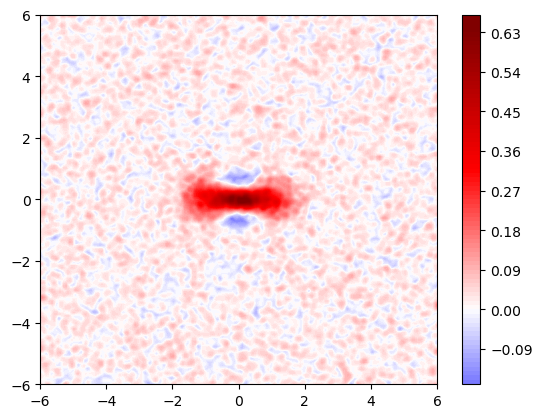

In [17]:
from scipy.ndimage import gaussian_filter

smoothing_sigma = 1.0
wigner_filtered = gaussian_filter(wigner_noisy, sigma=smoothing_sigma)


plot_wigner(xvec, yvec, wigner_filtered)

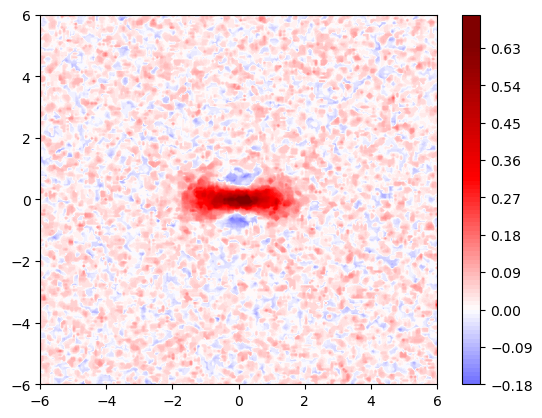

In [16]:
from scipy.ndimage import median_filter

# apply a 3×3 median filter
wigner_med = median_filter(wigner_noisy, size=(3,3))
plot_wigner(xvec, yvec, wigner_med)

### rescale wigner function
